In [6]:
from hbanalysis.hbanalysis import HBAgent
import matplotlib.pyplot as plt
rootfolder = '/home/yizaochen/codes/dna_rna/all_systems'

### Part 1: Initialize

In [58]:
host = 'g_tract_21mer'
h_agent = HBAgent(host, rootfolder)

/home/yizaochen/codes/dna_rna/all_systems/g_tract_21mer/bdna+bdna/hbdata exists


/home/yizaochen/miniconda3/envs/hbanalysis/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


### Part 2: Make/Read HDF5 file for HB-distance time series

In [31]:
# make
h_agent.make_hdf5()

Start 1-type1 distance extraction.
Start 1-type2 distance extraction.
Start 1-type3 distance extraction.
Start 2-type1 distance extraction.
Start 2-type2 distance extraction.
Start 2-type3 distance extraction.
Start 3-type1 distance extraction.
Start 3-type2 distance extraction.
Start 3-type3 distance extraction.
Start 4-type1 distance extraction.
Start 4-type2 distance extraction.
Start 4-type3 distance extraction.
Start 5-type1 distance extraction.
Start 5-type2 distance extraction.
Start 5-type3 distance extraction.
Start 6-type1 distance extraction.
Start 6-type2 distance extraction.
Start 6-type3 distance extraction.
Start 7-type1 distance extraction.
Start 7-type2 distance extraction.
Start 7-type3 distance extraction.
Start 8-type1 distance extraction.
Start 8-type2 distance extraction.
Start 8-type3 distance extraction.
Start 9-type1 distance extraction.
Start 9-type2 distance extraction.
Start 9-type3 distance extraction.
Start 10-type1 distance extraction.
Start 10-type2 dist

In [59]:
# read
h_agent.read_hdf5()

Read HB-Distance Time series from /home/yizaochen/codes/dna_rna/all_systems/g_tract_21mer/bdna+bdna/hbdata/hb_distance_timeseries.h5


### Part 3: Get HB-distance by BP-ID and type-name

In [4]:
time_array = h_agent.get_time_array()

In [27]:
bpid = 5
hbtype = 'type2' # 'type1', 'type2', 'type3'
hb_distance = h_agent.get_hb_timeseries_from_hdf5(bpid, hbtype)

### Part 4: Single Plot

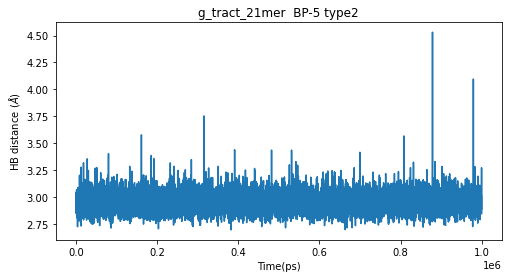

In [28]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(time_array, hb_distance)
ax.set_xlabel('Time(ps)')
ax.set_ylabel('HB distance ($\AA$)')
ax.set_title(f'{host}  BP-{bpid} {hbtype}')
#plt.savefig(f'{host}_{bpid}{hbtype}.png', dpi=100)
plt.show()

### Part 5: Multiple Plots

In [60]:
time_array = h_agent.get_time_array()

In [63]:
hbtype = 'type2' # 'type1', 'type2', 'type3'

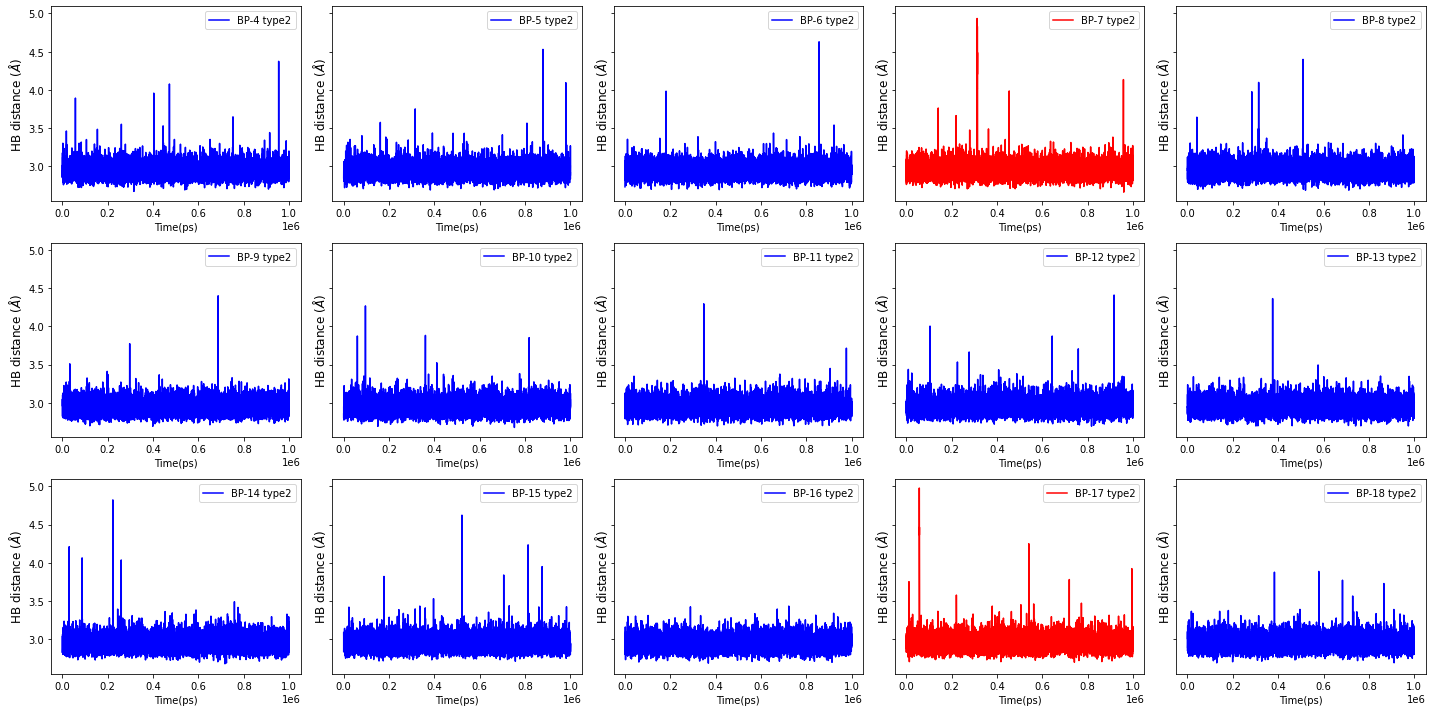

In [64]:
nrows = 3
ncols = 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10), sharey=True)

bpid = 4
for row_id in range(nrows):
    for col_id in range(ncols):
        hb_distance = h_agent.get_hb_timeseries_from_hdf5(bpid, hbtype)
        ax = axes[row_id, col_id]
        if bpid in [7, 17]:
            color = 'red'
        else:
            color = 'blue'
        ax.plot(time_array, hb_distance, color=color, label=f'BP-{bpid} {hbtype}')
        ax.set_xlabel('Time(ps)')
        ax.set_ylabel('HB distance ($\AA$)', fontsize=12)
        ax.legend()
        bpid += 1
        
plt.tight_layout()
#plt.savefig(f'{host}_{hbtype}.png', dpi=200)
plt.show()